# Introdu√ß√£o

No mercado financeiro altamente competitivo de hoje, reter clientes se tornou t√£o importante quanto adquirir novos. Bancos e institui√ß√µes financeiras enfrentam um desafio constante: entender por que seus clientes est√£o deixando a empresa e o que pode ser feito para evitar essa perda. Identificar os fatores que influenciam o churn ‚Äî ou seja, a evas√£o de clientes ‚Äî √© fundamental para desenvolver estrat√©gias de fideliza√ß√£o mais eficazes.



# Contexto

Com base em um conjunto de dados que re√∫ne informa√ß√µes sobre mais de 10 mil clientes de um banco, este projeto prop√µe uma an√°lise explorat√≥ria para investigar quais vari√°veis mais contribuem para a decis√£o de um cliente sair da institui√ß√£o. A base inclui atributos como pontua√ß√£o de cr√©dito, saldo banc√°rio, n√∫mero de produtos utilizados, n√≠vel de atividade, reclama√ß√µes e tipo de cart√£o utilizado ‚Äî fatores que ser√£o analisados para revelar padr√µes e tend√™ncias que ajudam a explicar o fen√¥meno do churn banc√°rio.

OU

Este projeto utiliza uma base de dados com informa√ß√µes detalhadas de clientes de um banco, incluindo dados demogr√°ficos, comportamento financeiro, uso de produtos e n√≠vel de satisfa√ß√£o. Atrav√©s de an√°lises estat√≠sticas e visualiza√ß√µes, buscamos compreender os principais fatores associados √† sa√≠da dos clientes, fornecendo insights que possam ajudar a direcionar a√ß√µes estrat√©gicas para melhorar a reten√ß√£o e a lealdade dos clientes.

## Importa√ß√£o da base de dados

*Os dados utilizados neste projeto foram obtidos da comunidade Kaggle e est√£o dispon√≠veis publicamente desde 2022, podendo ser acessados [neste link](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?resource=download)*

## Bibliotecas


In [234]:
# Tratamento e visualiza√ß√£o
import pandas as pd

#Conex√£o SQL
import sqlite3

# Visualiza√ß√£o dos dados
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# O arquivo original est√° em .csv, vamos transform√°-lo em banco de dados para trabalharmos via SQL
caminho = r'C:\Users\pedro\OneDrive\√Årea de Trabalho\Estudos\Potf√≥lio\ProjetosPython\Analise-de-Credito\Material\Customer-Churn-Records.csv'

#Carregando o csv em um dataframe
df_originalCSV = pd.read_csv(caminho)

#Criando a conex√£o na mem√≥ria
conn = sqlite3.connect(':memory:')

#Jogando o DF no banco
df_originalCSV.to_sql('Credito', conn, index=False, if_exists='replace')

df = pd.read_sql('SELECT * FROM Credito', conn)
df

c:\Users\pedro\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
0              464  
1              456  
2              377  
3              350  
4              425  
...            ...  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911  

[10000 rows x 18 columns]

## Entendendo os dados
Com a base importada, vamos entender os dados para fazermos as an√°lises. Mas antes, vamos ver o dicion√°rio das vari√°veis:

- RowNumber - Corresponde ao n√∫mero da linha do registro do cliente (sem efeito em nossa an√°lise, droparemos a coluna);
- CustomerId - ID √∫nico de cada cliente (sem efeito em nossa an√°lise, droparemos a coluna);
- Surname - Sobrenome do cliente (sem efeito em nossa an√°lise, droparemos a coluna);
- CreditScore - Pontua√ß√£o de cr√©dito do cliente; 
- Geography - Localiza√ß√£o do cliente;
- Gender - G√™nero do cliente;
- Age - Idade do cliente;
- Tenure - Tempo de v√≠nculo do cliente ao banco (√≥timo indicativo para an√°lise de churn);
- Balance - Saldo do cliente no banco (tamb√©m um √≥timo indicativo)
- NumOfProducts - N√∫mero de produtos que o cliente possui em nosso banco;
- HasCrCard - Se o cliente possui ou n√£o cart√£o de cr√©dito (0 para n√£o e 1 para sim); 
- IsActiveMember - Se o cliente √© membro ativo ou n√£o do banco;
- EstimatedSalary - Sal√°rio estimado **anual** do cliente;
- Exited - Indica se o cliente saiu ou n√£o do banco (0 para n√£o e 1 para sim);
- Complain - Indica se o cliente fez alguma reclama√ß√£o do banco (√≥timo indicativo para churn - 0 para n√£o e 1 para sim);
- Satisfaction Score - Pontua√ß√£o de satisfa√ß√£o do banco pelo cliente em pesquisa;
- Card Type - Tipo de cart√£o que o cliente possui;
- Point Earned - Pontos ganhos pelo cliente ao usar o cart√£o de cr√©dito do banco.


### Drop das colunas desnecess√°rias para nossa an√°lise de churn e ajuste de vari√°veis

In [236]:
# Como nesse projeto estamos utilizadno sqlite3, vamos selecionar as colunas necess√°rias e n√£o dropar as que n√£o usaremos, devido a limita√ß√µes do sqlite3. Al√©m disso, como no sqlite3 n√£o podemos usar ALTERTABLE ou RENAME COLUMN, vamos fazer uma nova base de dados com os dados corrigidos


# Criando a nova tabela com nomes de colunas sem espa√ßos
conn.execute('''
CREATE TABLE CreditoCorrigido AS
SELECT
    CreditScore,
    Geography,
    Gender,
    Age,
    Tenure,
    Balance,
    NumOfProducts,
    HasCrCard,
    IsActiveMember,
    EstimatedSalary,
    Exited,
    Complain,
    "Satisfaction Score" AS SatisfactionScore,
    "Card Type" AS CardType,
    "Point Earned" AS PointEarned
FROM Credito
''')

df_corrigido = pd.read_sql('SELECT * FROM CreditoCorrigido', conn)
df_corrigido.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   SatisfactionScore CardType  PointEarned  
0                  2  DIAMOND          464  
1                  3  DIAMOND          456  
2                  3  DIAMOND          377  
3                  5     GOLD          350  
4                  5     GOLD          425

### An√°lise explorat√≥ria Inicial

In [237]:
df_corrigido.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   SatisfactionScore CardType  PointEarned  
0                  2  DIAMOND          464  
1                  3  DIAMOND          456  
2                  3  DIAMOND          377  
3                  5     GOLD          350  
4                  5     GOLD          425

In [238]:
df_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Geography          10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Complain           10000 non-null  int64  
 12  SatisfactionScore  10000 non-null  int64  
 13  CardType           10000 non-null  object 
 14  PointEarned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


In [239]:
df_corrigido.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.00000    10000.000000     10000.000000  10000.000000   
mean       0.70550        0.515100    100090.239881      0.203800   
std        0.45584        0.499797     57510.492818      0.402842   
min        0.00000        0.000000        11.580000      0.000000   
25%        0.00000        0.000000     51002.110000      0.000000   
50%        1.00000        1.000000    100193.915000      0.000000   
75%        1.00000        1.000000    149388.247500      0.000000   
max        1.00000        1.000000    199992.480000      1.000000   

           Complain  SatisfactionScore   PointEarned  
count  10000.000000       10000.000000  10000.000000  
mean       0.204400           3.013800    606.515100  
std        0.403283           1.405919    225.924839  
min        0.000000           1.000000    119.000000  
25%        0.000000           2.000000    410.000000  
50%        0.000000           3.000000    605.000000  
75%        0.000000           4.000000    801.000000  
max        1.000000           5.000000   1000.000000

In [240]:
for col in df_corrigido.columns:
    nulos = df_corrigido[col].isna().sum()
    vazios = (df_corrigido[col] == "").sum()
    duplicados = df_corrigido[col].duplicated().sum()

    print(f'Coluna: {col}')
    print(f'‚Üí Dados nulos (NaN): {nulos}')
    print(f'‚Üí Dados vazios (""): {vazios}')
    print(f'‚Üí Dados duplicados (""): {duplicados}')
    print('-' * 10)

Coluna: CreditScore
‚Üí Dados nulos (NaN): 0
‚Üí Dados vazios (""): 0
‚Üí Dados duplicados (""): 9540
----------
Coluna: Geography
‚Üí Dados nulos (NaN): 0
‚Üí Dados vazios (""): 0
‚Üí Dados duplicados (""): 9997
----------
Coluna: Gender
‚Üí Dados nulos (NaN): 0
‚Üí Dados vazios (""): 0
‚Üí Dados duplicados (""): 9998
----------
Coluna: Age
‚Üí Dados nulos (NaN): 0
‚Üí Dados vazios (""): 0
‚Üí Dados duplicados (""): 9930
----------
Coluna: Tenure
‚Üí Dados nulos (NaN): 0
‚Üí Dados vazios (""): 0
‚Üí Dados duplicados (""): 9989
----------
Coluna: Balance
‚Üí Dados nulos (NaN): 0
‚Üí Dados vazios (""): 0
‚Üí Dados duplicados (""): 3618
----------
Coluna: NumOfProducts
‚Üí Dados nulos (NaN): 0
‚Üí Dados vazios (""): 0
‚Üí Dados duplicados (""): 9996
----------
Coluna: HasCrCard
‚Üí Dados nulos (NaN): 0
‚Üí Dados vazios (""): 0
‚Üí Dados duplicados (""): 9998
----------
Coluna: IsActiveMember
‚Üí Dados nulos (NaN): 0
‚Üí Dados vazios (""): 0
‚Üí Dados duplicados (""): 9998
----------
Colu

In [241]:
for col in df_corrigido.columns:
    print(f'Coluna {col}')
    print(df_corrigido[col].unique())
    print(f'- '*10)

Coluna CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709

In [242]:
#Vamos separar as colunas filtradas para utilizarmos nas consulta via SQL mais p frente
colunas_utilizadas = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'SatisfactionScore', 'CardType',	'PointEarned']

## Distribui√ß√£o dos dados
Como n√≥s n√£o temos dados nulos, vazios e, os duplicados n√£o comprometem nossa an√°lise, vamos ver como est√° a distribui√ß√£o dos valores em nossas colunas **num√©ricas**.

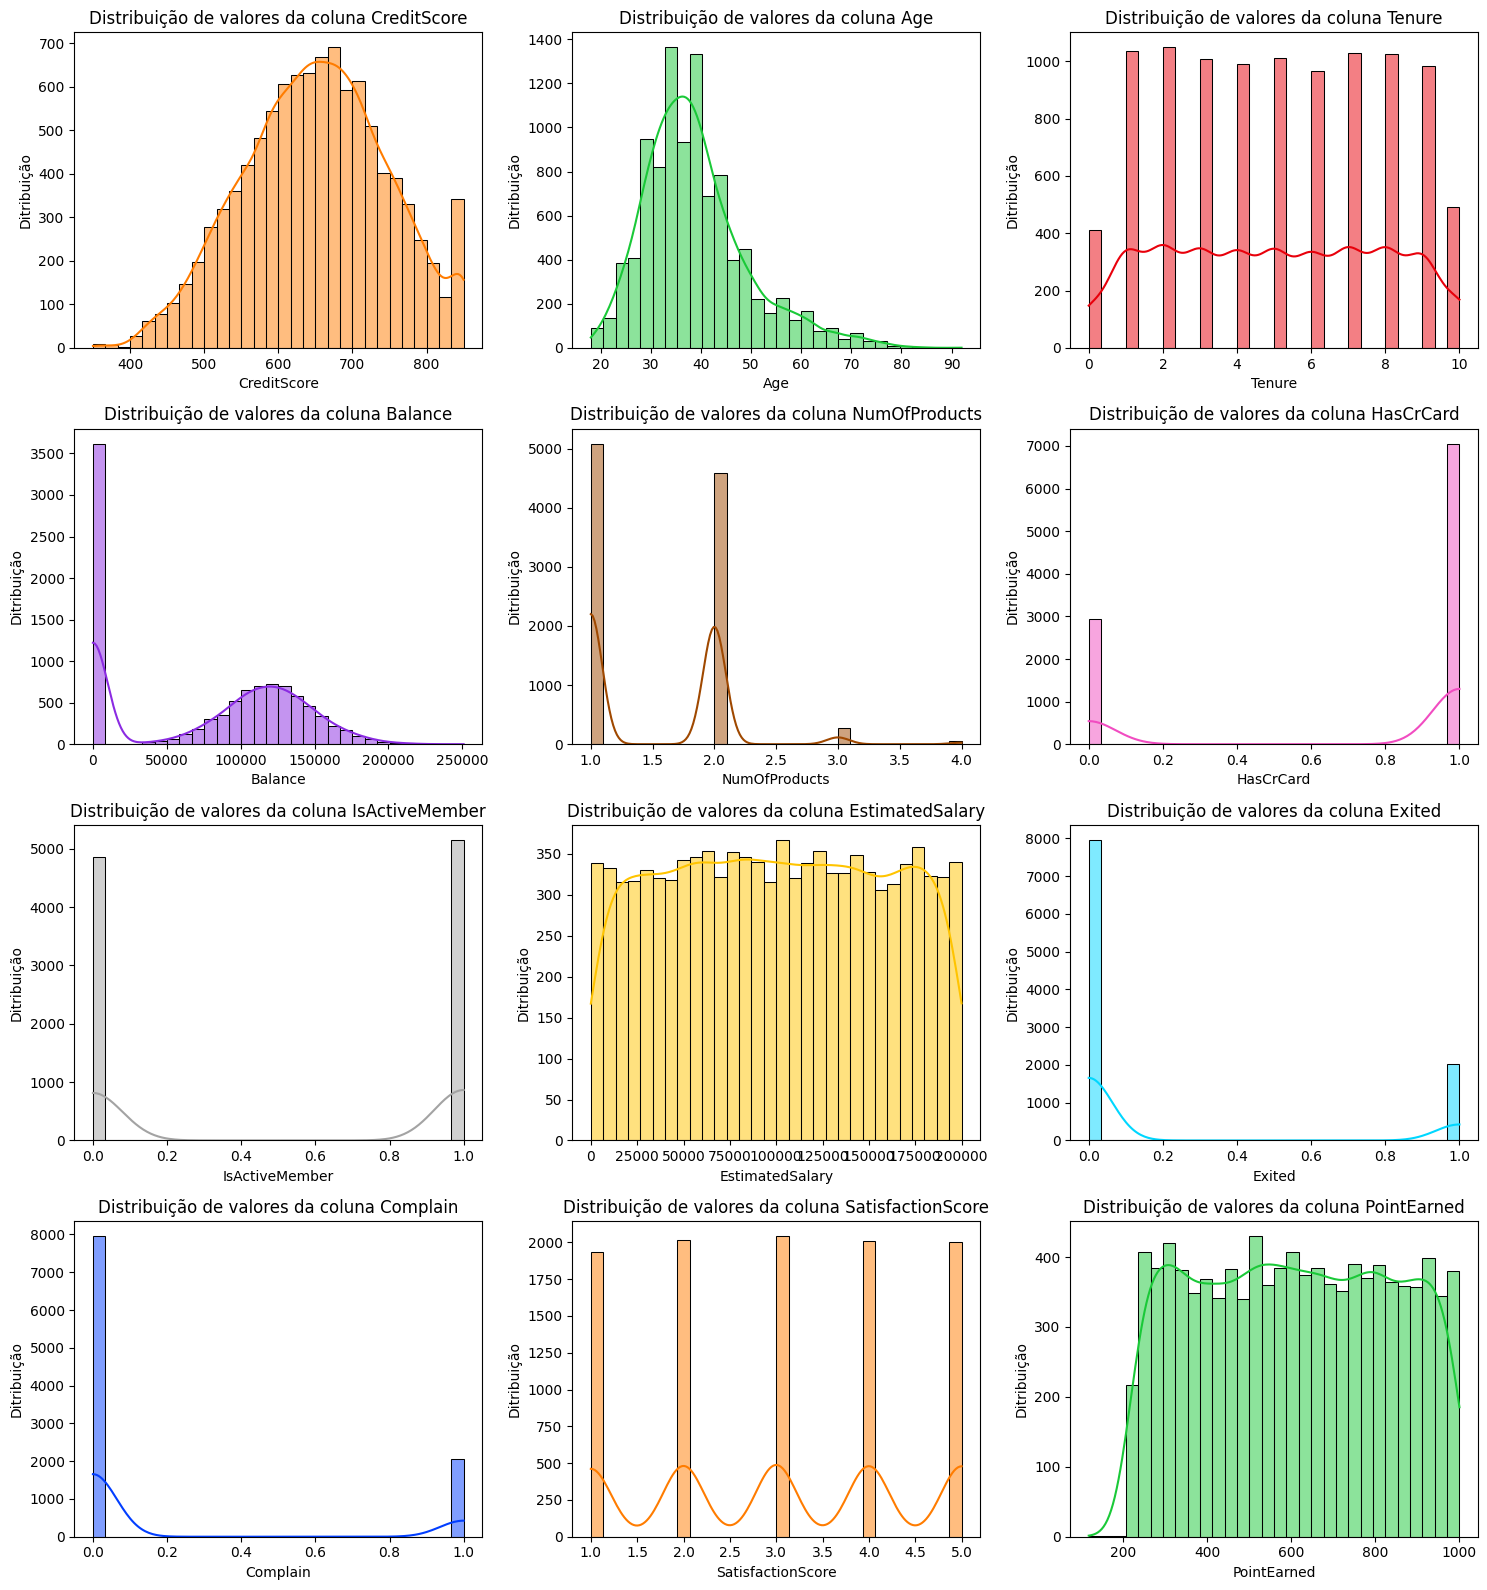

In [243]:
colunas_numericas = df_corrigido.select_dtypes(include='number').columns
total = len(colunas_numericas)

#cores
cores = sns.color_palette('bright')

#Tamanho
n_colunas = 3
n_linhas = (total + 1) // n_colunas
plt.figure(figsize=(n_colunas * 5, n_linhas * 4))

#Histograma
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(n_linhas, n_colunas, i)
    sns.histplot(df_corrigido[coluna], bins=30, kde=True, color=cores[i % len(cores)])
    plt.title(f'Distribui√ß√£o de valores da coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Ditribui√ß√£o')

plt.tight_layout()
plt.show()

### Avaliando a distribui√ß√£o de valores de cada vari√°vel independente, podemos concluir inicialmente:

- O score de cr√©dito (ScoreCredit) apresenta uma distribui√ß√£o normal, com concentra√ß√£o maior entre 600 e 700 pontos, sugerindo que a maioria dos clientes possui uma pontua√ß√£o de cr√©dito mediana, o que pode indicar baixo risco, mas tamb√©m nos d√° espa√ßo para estrat√©gias de fideliza√ß√£o.
- A idade dos clientes (Age) √© assim√©trica √† direita, com maior concentra√ß√£o na faixa entre 30 e 45 anos, o que sugere oportunidades para estrat√©gias de marketing e fideliza√ß√£o direcionadas a esse perfil.
- O tempo de v√≠nculo de nossos clientes (Tenure) apresenta uma distribui√ß√£o uniforme, indicando que a base de clientes √© bem distribu√≠da ao longo dos anos de perman√™ncia. O ponto-chave dessa vari√°vel √© identificar em que momento ocorre a maior evas√£o de clientes, aspecto que ser√° aprofundado posteriormente na an√°lise.
- No saldo dos clientes (Balance), h√° uma concentra√ß√£o relevante (e preocupante) de saldos zerados, o que nos alerta para poss√≠veis churns no futuro. Al√©m destes, o saldo √© seguido por uma cauda √† direita de clientes com saldo elevado, sugerindo a exist√™ncia de distintos perfis em nossa base ‚Äî entre clientes inativos ou c pouco engajamento e outros com maior potencial financeiro.
- No n√∫mero de produtos (NumOfProducts), a maioria dos clientes possui 0 ou 1, com poucos utilizando 3 ou mais. Pode indicar uma oportunidade de venda cruzada de novos produtos, sejam eles de cr√©dito, seguros ou servi√ßos complementares.
- As vari√°veis *HasCrCard, IsActiveMember, Exited e Complain* s√£o bin√°rias, podendo ser analisadas uma a uma. Vamos a elas:
    - **HasCrCard** - Cerca de 70% de nossa base possui cart√£o de cr√©dito, o que abre margem para fideliza√ß√£o via cr√©dito entre 30% do todo.
    - **IsActiveMember** - Cerca de 50% da nossa base **N√ÉO** est√° ativa, o que gera um grande alerta. Precisamos entender os motivos da inatividade e criar estrat√©gias para reengajar esses clientes.
    - **Exited** - Somente 20% dos clientes nunca sa√≠ram do banco.Temos uma alta rotatividade, mas h√° ind√≠cios de retorno por parte de alguns. √â essencial investigar os fatores que levam ao abandono e o que motiva o retorno.
    - **Complain** - A grande maioria dos clientes nunca fez alguma reclama√ß√£o do nosso banco ou servi√ßos (quase 80%), o que mostra uma percep√ß√£o positiva geral do banco. Ainda assim √© necess√°rio entender os casos de insatisfa√ß√£o para melhoria cont√≠nua.
- No sal√°rio estimado (EstimatedSalary), nos √© apresentado uma distribui√ß√£o uniforme, sugerindo boa diversidade no perfil de renda dos clientes.
- A satisfa√ß√£o com nosso banco (Satisfaction Score) apresenta uma distribui√ß√£o equilibrada, sem predomin√¢ncia de notas altas ou baixas.
- A distribui√ß√£o de pontos (Point Earned) est√° bem espalhada, com leve concentra√ß√£o nas faixas mais elevadas, indicando que os clientes mais engajados est√£o sendo recompensados.

### Com os dados compreendidos e suas distribui√ß√µes analisadas, vamos explorar alguns cen√°rios para um entendimento completo / Vamos para as an√°lises ARRUMAR

# Situa√ß√µes (Arrumar ou apagar)

1. Entendimento dos Perfis e Distribui√ß√£o da Base de Clientes
- **Objetivo**: Consolidar os tr√™s perfis identificados (Ativos, Inativos e Evadidos) com base em vari√°veis comportamentais, financeiras e de relacionamento.
- **Insight esperado**: Observar o quanto cada grupo representa da base total (completando os 10 mil clientes) e fornecer um panorama claro para a√ß√µes direcionadas por time (Marketing, CRM, Produtos e Relacionamento).


2. Riscos de Evas√£o no Grupo Ativo e Inativo
- **Objetivo**: Identificar sinais de churn nos clientes ainda na base, principalmente entre os inativos e parte dos ativos com engajamento baixo.
- **Vari√°veis-chave**: Exited, Age, Tenure, Balance, IsActiveMember, SatisfactionScore, Complain.
- **Insight esperado**: Antecipar comportamentos semelhantes aos dos evadidos para cria√ß√£o de campanhas de reten√ß√£o preventivas.


3. Potencial de Cross-Selling entre Ativos Engajados
- **Objetivo**: Encontrar clientes ativos com maior abertura para aquisi√ß√£o de novos produtos (seguros, cr√©dito, investimentos).
- **Vari√°veis-chave**: NumOfProducts, EstimatedSalary, ScoreCredit, PointEarned, IsActiveMember.
- **Insight esperado**: Criar segmenta√ß√µes inteligentes para campanhas de upsell e cross-sell, especialmente entre os mais satisfeitos e engajados.


4. Oportunidades de Reativa√ß√£o entre Inativos
- **Objetivo**: Mapear quais perfis inativos demonstram potencial financeiro ou hist√≥rico de engajamento que justifique esfor√ßos de reativa√ß√£o.
- **Vari√°veis-chave**: NumOfProducts, EstimatedSalary, ScoreCredit, PointEarned, SatisfactionScore.
- **Insight esperado**: Priorizar os inativos de maior valor para a√ß√µes de CRM e relacionamento personalizado.
 ofertas.


5. Diagn√≥stico Final: Potencial Financeiro vs. Engajamento
- **Objetivo**: Detectar clientes subaproveitados ‚Äî com boa renda ou saldo, mas baixo relacionamento.
- **Vari√°veis-chave**: Balance, EstimatedSalary, NumOfProducts, IsActiveMember, PointEarned.
- **Insight esperado**: Identificar alvos priorit√°rios para campanhas de ativa√ß√£o ou expans√£o do relacionamento.

1. Entendimento dos Perfis e Distribui√ß√£o da Base de Clientes
- **Objetivo**: Consolidar os tr√™s perfis identificados (Ativos, Inativos e Evadidos) com base em vari√°veis comportamentais, financeiras e de relacionamento.
- **Insight esperado**: Observar o quanto cada grupo representa da base total (completando os 10 mil clientes) e fornecer um panorama claro para a√ß√µes direcionadas por time (Marketing, CRM, Produtos e Relacionamento).


### Perfil dos clientes que sa√≠ram

Para iniciar nossa an√°lise, √© essencial compreendermos tanto o perfil geral dos clientes quantos o perfil daqueles que optaram por encerrar suas contas com o banco. Entender fatores como idade, renda, tempo de relacionamento, score e outros indicadores nos permitir√° tra√ßar estrat√©gias melhores de reten√ß√£o. 

Para isso, os clientes ser√£o segmentados em tr√™s grupos distintos com base nos dados abaixo que falam sobre os clientes que sa√≠ram do banco e dos que est√£o com as contas ativas ou n√£o.

![alt text](clientesEvadidosXMembrosAtivos.png)

Com base nisso, os grupos ser√£o:

- **Grupo Ativo** - Clientes atualmente ativos 
- **Grupo Inativo** - Clientes que possuem a conta, mas sem movimenta√ß√µes recentes.
- **Grupo Evadido (churn)** - Clientes que encerraram suas contas.

#### üü© | Grupo Ativo 

*Clientes com conta ativa e movimenta√ß√£o recente. Representam o p√∫blico engajado da base e s√£o priorit√°rios para estrat√©gias de manuten√ß√£o e fideliza√ß√£o.*

In [244]:
# Para isso, vamos filtrar os clientes em uma query contendo aqueles que n√£o sa√≠ram de nosso banco, mas que tamb√©m est√£o com as contas ativas.
query = f'''
SELECT {", ".join(colunas_utilizadas)} 
FROM CreditoCorrigido
WHERE Exited = 0 AND IsActiveMember = 1
'''

df_ativos = pd.read_sql(query, conn)
df_ativos

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             608     Spain  Female   41       1   83807.86              1   
1             850     Spain  Female   43       2  125510.82              1   
2             822    France    Male   50       7       0.00              2   
3             501    France    Male   44       4  142051.07              2   
4             684    France    Male   27       2  134603.88              1   
...           ...       ...     ...  ...     ...        ...            ...   
4411          602   Germany    Male   35       7   90602.42              2   
4412          673   Germany    Male   47       1  183579.54              2   
4413          606     Spain    Male   30       8  180307.73              2   
4414          841     Spain    Male   28       4       0.00              2   
4415          516    France    Male   35      10   57369.61              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             0               1        112542.58       0         1   
1             1               1         79084.10       0         0   
2             1               1         10062.80       0         0   
3             0               1         74940.50       0         0   
4             1               1         71725.73       0         0   
...         ...             ...              ...     ...       ...   
4411          1               1         51695.41       0         1   
4412          0               1         34047.54       0         0   
4413          1               1          1914.41       0         0   
4414          1               1        179436.60       0         0   
4415          1               1        101699.77       0         0   

      SatisfactionScore  CardType  PointEarned  
0                     3   DIAMOND          456  
1                     5      GOLD          425  
2                     2    SILVER          206  
3                     3      GOLD          251  
4                     3      GOLD          342  
...                 ...       ...          ...  
4411                  3      GOLD          764  
4412                  5  PLATINUM          772  
4413                  3    SILVER          567  
4414                  5      GOLD          393  
4415                  5  PLATINUM          771  

[4416 rows x 15 columns]

In [245]:
df_ativos.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  4416.000000  4416.000000  4416.000000    4416.000000    4416.000000   
mean    654.213542    38.963995     4.957201   73304.717314       1.535779   
std      95.145008    11.765771     2.891661   62486.761557       0.511332   
min     405.000000    18.000000     0.000000       0.000000       1.000000   
25%     588.750000    31.000000     2.000000       0.000000       1.000000   
50%     656.000000    37.000000     5.000000   92212.200000       2.000000   
75%     719.000000    43.000000     7.000000  125912.632500       2.000000   
max     850.000000    92.000000    10.000000  212778.200000       3.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Exited     Complain  \
count  4416.000000          4416.0      4416.000000  4416.0  4416.000000   
mean      0.707654             1.0     99253.061793     0.0     0.001359   
std       0.454892             0.0     57391.253792     0.0     0.036840   
min       0.000000             1.0        90.070000     0.0     0.000000   
25%       0.000000             1.0     50781.767500     0.0     0.000000   
50%       1.000000             1.0     98947.335000     0.0     0.000000   
75%       1.000000             1.0    148182.365000     0.0     0.000000   
max       1.000000             1.0    199953.330000     0.0     1.000000   

       SatisfactionScore  PointEarned  
count        4416.000000  4416.000000  
mean            3.030797   607.028306  
std             1.405523   226.011166  
min             1.000000   206.000000  
25%             2.000000   410.000000  
50%             3.000000   605.000000  
75%             4.000000   802.250000  
max             5.000000  1000.000000

##### Perfil do Grupo Ativo

- Perfil Geral: Clientes com idade m√©dia de 39 anos e score de cr√©dito m√©dio de 654, indicando um perfil relativamente jovem e com certos riscos financeiros.
- Saldo: M√©dia de renda de R$  92 mil/ano e 25% com saldo zerado ‚Äî poss√≠vel sinal de pouco engajamento em parte da base, apesar do alto potencial financeiro m√©dio.
- Produtos: A maioria possui 2 produtos, e praticamente todos t√™m cart√£o de cr√©dito.
- Satisfa√ß√£o e Pontua√ß√£o: M√©dia de satisfa√ß√£o em 3 (neutra) e pontua√ß√£o m√©dia acumulada em 607 ‚Äî ind√≠cio de envolvimento moderado e possibilidade de fideliza√ß√£o com est√≠mulo certo.

#### üü® | Grupo Inativo 

*Clientes com conta aberta, mas sem movimenta√ß√µes recentes. Indicam potencial risco de evas√£o e requerem a√ß√µes de reativa√ß√£o.*

In [246]:
# Para os inativos, vamos filtra-los em uma query contendo aqueles que n√£o cancalaram suas contas, mas que n√£o a movimentam mais.
query = '''
SELECT *
FROM CreditoCorrigido
WHERE Exited = 0 AND IsActiveMember = 0
'''

df_inativos = pd.read_sql(query, conn)
df_inativos

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             699    France  Female   39       1       0.00              2   
1             528    France    Male   31       6  102016.72              2   
2             497     Spain    Male   24       3       0.00              2   
3             476    France  Female   34      10       0.00              2   
4             549    France  Female   25       5       0.00              2   
...           ...       ...     ...  ...     ...        ...            ...   
3541          726     Spain    Male   36       2       0.00              1   
3542          644    France    Male   28       7  155060.41              1   
3543          800    France  Female   29       2       0.00              2   
3544          771    France    Male   39       5       0.00              2   
3545          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             0               0         93826.63       0         0   
1             0               0         80181.12       0         0   
2             1               0         76390.01       0         0   
3             1               0         26260.98       0         0   
4             0               0        190857.79       0         0   
...         ...             ...              ...     ...       ...   
3541          1               0        195192.40       0         0   
3542          1               0         29179.52       0         0   
3543          0               0        167773.55       0         0   
3544          1               0         96270.64       0         0   
3545          1               0         38190.78       0         0   

      SatisfactionScore  CardType  PointEarned  
0                     5      GOLD          350  
1                     3      GOLD          264  
2                     3      GOLD          249  
3                     3    SILVER          119  
4                     3  PLATINUM          549  
...                 ...       ...          ...  
3541                  5    SILVER          560  
3542                  5   DIAMOND          715  
3543                  4  PLATINUM          311  
3544                  1   DIAMOND          300  
3545                  3   DIAMOND          911  

[3546 rows x 15 columns]

In [247]:
df_inativos.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  3546.000000  3546.000000  3546.000000    3546.000000     3546.00000   
mean    648.879301    35.470389     5.126904   72042.907253        1.55471   
std      96.206721     7.147319     2.864150   63304.809293        0.50718   
min     408.000000    18.000000     0.000000       0.000000        1.00000   
25%     582.250000    31.000000     3.000000       0.000000        1.00000   
50%     650.000000    35.000000     5.000000   91776.980000        2.00000   
75%     716.000000    40.000000     8.000000  127059.967500        2.00000   
max     850.000000    77.000000    10.000000  221532.800000        3.00000   

         HasCrCard  IsActiveMember  EstimatedSalary  Exited     Complain  \
count  3546.000000          3546.0      3546.000000  3546.0  3546.000000   
mean      0.706430             0.0    100316.887713     0.0     0.001128   
std       0.455462             0.0     57413.419717     0.0     0.033572   
min       0.000000             0.0        96.270000     0.0     0.000000   
25%       0.000000             0.0     50956.250000     0.0     0.000000   
50%       1.000000             0.0    100145.565000     0.0     0.000000   
75%       1.000000             0.0    148809.445000     0.0     0.000000   
max       1.000000             0.0    199992.480000     0.0     1.000000   

       SatisfactionScore  PointEarned  
count        3546.000000  3546.000000  
mean            3.001974   607.063734  
std             1.410317   226.223788  
min             1.000000   119.000000  
25%             2.000000   414.000000  
50%             3.000000   602.000000  
75%             4.000000   800.000000  
max             5.000000  1000.000000

##### Perfil do Grupo Inativo

- Perfil Geral: Idade m√©dia de 35 anos e score m√©dio de 648 ‚Äî perfil jovem e financeiramente arriscado.
- Saldo: Renda m√©dia de R$ 100 mil/ano e com 25% dos clientes com saldo zerado ‚Äî apesar da renda maior do que os clientes ativos, temos 1/4 dos clientes com saldo zerado.
- Produtos: Em geral, 1 produto ativo; muitos mant√™m apenas v√≠nculo b√°sico.
- Satisfa√ß√£o e Pontua√ß√£o: Satisfa√ß√£o m√©dia de 3 ‚Äî percep√ß√£o de desempenho m√©dio do banco; foco deve ser em reativa√ß√£o com ofertas segmentadas.

#### üü• | Grupo Evadido (churn) 

*Clientes que encerraram suas contas. S√£o analisados para identifica√ß√£o de padr√µes de evas√£o e suporte √† constru√ß√£o de estrat√©gias preventivas.*

In [248]:
# Para os Evadidos, vamos filtr√°-los por uma query que contenha aqueles que cancelaram suas contas.
query = '''
SELECT *
FROM CreditoCorrigido
WHERE Exited = 1
'''
df_evadidos = pd.read_sql(query, conn)
df_evadidos

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             502    France  Female   42       8  159660.80              3   
2             645     Spain    Male   44       8  113755.78              2   
3             376   Germany  Female   29       4  115046.74              4   
4             653   Germany    Male   58       1  132602.88              1   
...           ...       ...     ...  ...     ...        ...            ...   
2033          498   Germany    Male   42       3  152039.70              1   
2034          655   Germany  Female   46       7  137145.12              1   
2035          597    France  Female   53       4   88381.21              1   
2036          709    France  Female   36       7       0.00              1   
2037          772   Germany    Male   42       3   75075.31              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             1               0        113931.57       1         1   
2             1               0        149756.71       1         1   
3             1               0        119346.88       1         1   
4             1               0          5097.67       1         0   
...         ...             ...              ...     ...       ...   
2033          1               1         53445.17       1         1   
2034          1               0        115146.40       1         1   
2035          1               0         69384.71       1         1   
2036          0               1         42085.58       1         1   
2037          1               0         92888.52       1         1   

      SatisfactionScore CardType  PointEarned  
0                     2  DIAMOND          464  
1                     3  DIAMOND          377  
2                     5  DIAMOND          484  
3                     2  DIAMOND          282  
4                     2   SILVER          163  
...                 ...      ...          ...  
2033                  3     GOLD          790  
2034                  4     GOLD          591  
2035                  3     GOLD          369  
2036                  3   SILVER          564  
2037                  2     GOLD          339  

[2038 rows x 15 columns]

In [249]:
df_evadidos.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  2038.000000  2038.000000  2038.000000    2038.000000    2038.000000   
mean    645.414622    44.835623     4.934740   91109.476006       1.475466   
std     100.337351     9.759754     2.936768   58346.483197       0.801408   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     578.000000    38.000000     2.000000   38591.222500       1.000000   
50%     646.000000    45.000000     5.000000  109344.230000       1.000000   
75%     716.000000    51.000000     8.000000  131423.637500       2.000000   
max     850.000000    84.000000    10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Exited     Complain  \
count  2038.000000     2038.000000      2038.000000  2038.0  2038.000000   
mean      0.699215        0.360648    101509.908783     1.0     0.998037   
std       0.458712        0.480306     57932.623392     0.0     0.044270   
min       0.000000        0.000000        11.580000     1.0     0.000000   
25%       0.000000        0.000000     51924.020000     1.0     1.000000   
50%       1.000000        0.000000    102489.335000     1.0     1.000000   
75%       1.000000        1.000000    152443.857500     1.0     1.000000   
max       1.000000        1.000000    199808.100000     1.0     1.000000   

       SatisfactionScore  PointEarned  
count        2038.000000  2038.000000  
mean            2.997547   604.448479  
std             1.399381   225.315301  
min             1.000000   163.000000  
25%             2.000000   405.000000  
50%             3.000000   610.500000  
75%             4.000000   793.000000  
max             5.000000  1000.000000

#### Perfil do Grupo Evadido 

- Perfil Geral: Idade m√©dia de 45 anos e score m√©dio de 645 ‚Äî  perfil mais maduro, mas com tend√™ncia √† instabilidade ou descontentamento com o servi√ßo.
- Saldo: Renda m√©dia de R$ 100 mil/ano e saldo m√©dio de R$ 91 mil. Um p√∫blico com renda e sa√≠ndo de nosso banco (perda de clientes valiosos).
- Produtos: M√©dia de 1,47 produtos, geralmente com cart√£o de cr√©dito (70% possuem) e presen√ßa m√≠nima de produtos adicionais.
- Satisfa√ß√£o e Pontua√ß√£o: Satisfa√ß√£o m√©dia neutra de 3 ‚Äî Aqui √© interessante notar a taxa de Complain que est√° em praticamente todos os ex-clientes (99,8% de m√©dia), precisamos entender se as reclama√ß√µes desses clientes foram atendidas ou n√£o.

### Conclus√µes dos Perfis

Com a separa√ß√£o clara entre os grupos **Ativo, Inativo e Evadido**, foi poss√≠vel mapear o perfil completo dos 10 mil clientes da base, divididos da seguinte forma:

- Grupo Ativo: 4.036 clientes
- Grupo Inativo: 3.926 clientes
- Grupo Evadido: 2.038 clientes

Cada grupo apresenta comportamentos, n√≠veis de engajamento e potenciais distintos:

- O **Grupo Ativo** representa o p√∫blico com maior presen√ßa de produtos, uso constante e **potencial de fideliza√ß√£o** ‚Äî mas ainda com uma parcela significativa com saldo zerado, o que aponta para **oportunidades de engajamento**.
- O **Grupo Inativo** concentra clientes mais jovens, com boa renda, mas que mant√™m relacionamento b√°sico e desativaram parcialmente sua movimenta√ß√£o ‚Äî um **perfil ideal para a√ß√µes de reativa√ß√£o com ofertas personalizadas**.
- J√° o **Grupo Evadido**, com m√©dia de idade mais alta e saldo financeiro elevado, representa uma **perda direta de clientes valiosos** ‚Äî agravada por um **volume alt√≠ssimo de reclama√ß√µes (99,8%)**, o que refor√ßa a import√¢ncia de a√ß√µes de reten√ß√£o e p√≥s-venda mais eficazes.

Essa segmenta√ß√£o permite uma vis√£o estrat√©gica mais precisa, direcionando o trabalho dos times de marketing, CRM, produtos e relacionamento, com abordagens espec√≠ficas para cada grupo com base no seu n√≠vel de engajamento e valor potencial.

---

### Riscos de Evas√£o no Grupo Ativo e Inativo
- **Objetivo**: Identificar sinais de churn nos clientes ainda na base, principalmente entre os inativos e parte dos ativos com engajamento baixo.
- **Vari√°veis-chave**: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, SatisfactionScore, Complain e PointEarned.
- **Insight esperado**: Antecipar comportamentos semelhantes aos dos evadidos para cria√ß√£o de campanhas de reten√ß√£o preventivas.

Para analisar os riscos de evas√£o entre os grupos Ativo e Inativo, vamos utilizar as vari√°veis *CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, SatisfactionScore, Complain e PointEarned*, comparando seus padr√µes com os do grupo Evadido.\
A partir dessa an√°lise comparativa, vamos **identificar clientes com sinais moderados ou fortes de evas√£o**. Com isso, segmentaremos os ativos e inativos em dois subgrupos:

- Um com alguns indicativos de churn, que merece aten√ß√£o e acompanhamento;
- Outro com fortes evid√™ncias de que ir√£o encerrar a conta, demandando a√ß√µes imediatas de reten√ß√£o.

Essa abordagem nos permitir√° priorizar campanhas preventivas com base no grau de risco de cada cliente, otimizando os esfor√ßos de relacionamento e fideliza√ß√£o.

In [ ]:
lista_risco_evasao = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'SatisfactionScore', 'Complain', 'PointEarned']


df_ativos_risco_evasao = df_ativos[lista_risco_evasao]
df_inativos_risco_evasao = df_inativos[lista_risco_evasao]
df_evadidos_risco_evasao = df_evadidos[lista_risco_evasao]

print("### Grupo Evadido")
display(df_evadidos_risco_evasao.head())

print("\n### Grupo Ativo")
display(df_ativos_risco_evasao.head())

print("\n### Grupo Inativo")
display(df_inativos_risco_evasao.head())

SyntaxError: invalid syntax (924853367.py, line 1)

#### Com os grupos separados e as colunas relevantes selecionadas, o pr√≥ximo passo √© identificar quantos perfis dos grupos Ativo e Inativo apresentam caracter√≠sticas semelhantes √†s dos clientes Evadidos.

In [ ]:
# Exemplo de condi√ß√£o com base em padr√µes dos evadidos
condicoes_de_risco = (
    (df_ativos_risco_evasao['Satisfaction Score'] <= 3) &
    (df_ativos_risco_evasao['IsActiveMember'] == 1) &
    (df_ativos_risco_evasao['Complain'] == 1)
)

ativos_com_risco = df_ativos_risco_evasao[condicoes_de_risco]
print(f"Ativos com perfil de risco semelhante ao dos evadidos: {ativos_com_risco.shape[0]}")

# Mesmo para os inativos
inativos_com_risco = df_inativos_risco_evasao[condicoes_de_risco]
print(f"Inativos com perfil de risco semelhante ao dos evadidos: {inativos_com_risco.shape[0]}")


Ativos com perfil de risco semelhante ao dos evadidos: 5
Inativos com perfil de risco semelhante ao dos evadidos: 3


C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == "":


# An√°lises

# Resultados

# Finaliza√ß√£o